<a href="https://colab.research.google.com/github/sharvaniyadav/ECE1513-Intro-To-Machine-Learning/blob/main/Assignment_1_ECE1513_IntroToML_SharvaniYadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PART 1: CLUSTERING WITH K-MEANS

### 1. (5 points) Implement k-means yourself. Your function should take in an array containing a dataset and a value of k, and return the cluster centroids along with the cluster assignmentfor each data point. You may choose the centroid initialization heuristic of your choice among the two we saw in class. Hand-in the code for full credit. For this question, you should not rely on any library other than numPy in Python.

In [ ]:
# Course: ECE1513 Introduction to Machine Learning (Fall 2025)
# Assignment 1
# Student Name: Sharvani Yadav
# Student Number: 1008289870

# Part 1: Clustering with k-means
# This code for Part 1.1 implements k-means clustering from scratch using only NumPy.
# It uses an initialization method discussed in class (sampling points from dataset).

# -------------------------------------------------------------------------------------------------
# Part 1.1: Implemented k-means using a single initialization method (sampling points from dataset)
# -------------------------------------------------------------------------------------------------

# Imported needed libraries
import numpy as np
from sklearn.datasets import load_breast_cancer

# STEP 1: Loaded the dataset
data = load_breast_cancer()
X = data.data.astype(float)

print("Dataset loaded successfully.")
print(f"Shape of X: {X.shape} (rows, columns)")

# STEP 2: Standardized the dataset
feature_means = X.mean(axis=0)
feature_stds = X.std(axis=0, ddof=0)
feature_stds[feature_stds == 0] = 1.0
Xs = (X - feature_means) / feature_stds

print("Dataset standardized (mean ≈ 0, std ≈ 1 for each feature).")

# STEP 3: Helper functions for k-means
def init_centroids_from_data(X, k, seed=42):
    rng = np.random.default_rng(seed)
    idx = rng.choice(X.shape[0], size=k, replace=False)
    return X[idx].copy()

def assign_labels(X, centroids):
    diff = X[:, None, :] - centroids[None, :, :]
    distances = np.sum(diff ** 2, axis=2)
    return np.argmin(distances, axis=1)

def recompute_centroids(X, labels, k):
    d = X.shape[1]
    new_centroids = np.empty((k, d), dtype=X.dtype)
    global_mean = X.mean(axis=0)
    for j in range(k):
        pts = X[labels == j]
        if pts.size > 0:
            new_centroids[j] = pts.mean(axis=0)
        else:
            new_centroids[j] = global_mean
    return new_centroids

# STEP 4: Full k-means function
def kmeans(X, k, *, max_iter=300, tol=1e-4, seed=42):
    centroids = init_centroids_from_data(X, k, seed)
    for _ in range(max_iter):
        labels = assign_labels(X, centroids)
        new_centroids = recompute_centroids(X, labels, k)
        shift = np.linalg.norm(new_centroids - centroids)
        centroids = new_centroids
        if shift < tol:
            break
    return centroids, labels

# Quick confirmation run (optional, just to verify kmeans works for k=2)
centroids, labels = kmeans(Xs, k=2)
print("k-means function ran successfully for k=2.")
print(f"Centroids shape: {centroids.shape}, Labels shape: {labels.shape}")


Dataset loaded successfully.
Shape of X: (569, 30) (rows, columns)
Dataset standardized (mean ≈ 0, std ≈ 1 for each feature).
k-means function ran successfully for k=2.
Centroids shape: (2, 30), Labels shape: (569,)


### 2. (1 point) Run the k-means algorithm for values of k varying between 2 and 7, at increments of 1. In your answer to this part, list the inputs passed to the k-means algorithm.

In [ ]:
# -------------------------------------------------------------------------
# Part 1.2: Ran k-means for k = 2..7 and listed the inputs used each time
# -------------------------------------------------------------------------

print("\nRunning k-means for k = 2..7")

for k in range(2, 8):
    print(f"\nk = {k}")
    print("Inputs used:")
    print("  dataset = standardized breast-cancer features (Xs)")
    print("  X shape =", Xs.shape)
    print("  init = sample-from-dataset")
    print("  max_iter = 300")
    print("  tol = 1e-4")
    print("  seed = 42")

    # run k-means
    centroids, labels = kmeans(Xs, k=k, max_iter=300, tol=1e-4, seed=42)

    # quick confirmation (shapes only)
    print("Outputs:")
    print("  centroids shape =", centroids.shape)
    print("  labels shape =", labels.shape)


Running k-means for k = 2..7

k = 2
Inputs used:
  dataset = standardized breast-cancer features (Xs)
  X shape = (569, 30)
  init = sample-from-dataset
  max_iter = 300
  tol = 1e-4
  seed = 42
Outputs:
  centroids shape = (2, 30)
  labels shape = (569,)

k = 3
Inputs used:
  dataset = standardized breast-cancer features (Xs)
  X shape = (569, 30)
  init = sample-from-dataset
  max_iter = 300
  tol = 1e-4
  seed = 42
Outputs:
  centroids shape = (3, 30)
  labels shape = (569,)

k = 4
Inputs used:
  dataset = standardized breast-cancer features (Xs)
  X shape = (569, 30)
  init = sample-from-dataset
  max_iter = 300
  tol = 1e-4
  seed = 42
Outputs:
  centroids shape = (4, 30)
  labels shape = (569,)

k = 5
Inputs used:
  dataset = standardized breast-cancer features (Xs)
  X shape = (569, 30)
  init = sample-from-dataset
  max_iter = 300
  tol = 1e-4
  seed = 42
Outputs:
  centroids shape = (5, 30)
  labels shape = (569,)

k = 6
Inputs used:
  dataset = standardized breast-cancer fea

### 3. (2 points) Plot the distortion achieved by k-means for values of k varying between 2 and 7, at increments of 1. Hand-in the code and figure output for full credit. For this question, you may rely on plotting libraries such as matplotlib.

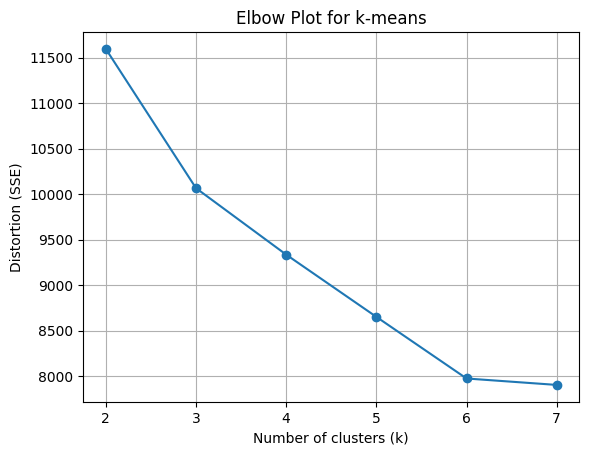

In [ ]:
# -------------------------------------------------------------------------
# Part 1.3: Plotted distortion for k = 2 to 7 (elbow curve)
# -------------------------------------------------------------------------

# -----------------------------------
# Computed and plotted distortion:
# -----------------------------------

# Imported matplotlib for plotting
import matplotlib.pyplot as plt

# Made a list to save the distortions
distortions = []

# Tried k from 2 to 7 and calculated distortion for each one
for k in range(2, 8):
    # Ran k-means for this k value
    centroids, labels = kmeans(Xs, k=k, max_iter=300, tol=1e-4, seed=42)

    # Found how far each point was from its assigned centroid (squared distance)
    squared_distances = (Xs - centroids[labels]) ** 2

    # Added up all the squared distances to get total distortion
    sse = np.sum(squared_distances)
    distortions.append(sse)

# Plotted k on the x-axis and distortion on the y-axis
plt.plot([2, 3, 4, 5, 6, 7], distortions, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Distortion (SSE)")
plt.title("Elbow Plot for k-means")
plt.grid(True)
plt.show()

### 4. (1 point) If you had to pick one value of k, which value would you pick? Justify your choice.

After reviewing the elbow plot, the most appropriate choice of k is 6. The distortion decreases significantly from k=2 through k=4 and continues to decline for k=5 and k=6. Beyond k=6, the curve levels off and the reduction in distortion from k=6 to k=7 is minimal. This indicates that six clusters provide a strong balance between minimizing distortion and avoiding unnecessary model complexity.

## PART 4: EIGENVALUE INTERPRETATION VIA NORM MAXIMIZATION: IMPLEMENTATION

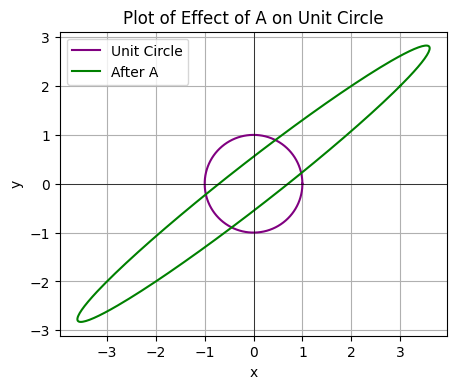


Maximum value of ||A v||: 4.561552812808831
Unit vector v that achieves it: [0.78820544 0.61541221]
Check (||A v_max||): 4.561552812808831

Eigenvalues: [4.56155281 0.43844719]
Eigenvectors (each column is a vector):
[[ 0.78820544 -0.61541221]
 [ 0.61541221  0.78820544]]

Biggest eigenvalue: 4.561552812808831
Eigenvector for biggest eigenvalue (unit vector): [0.78820544 0.61541221]

A * v_biggest = [3.59544073 2.80723529]

Compare the two:
v_biggest: [0.78820544 0.61541221]
A * v_biggest: [3.59544073 2.80723529]
Observation: A * v_biggest points in the same direction as v_biggest (just longer).


In [ ]:
# -----------------------------------------------------------
# Part 4.1 + 4.2 + 4.3: Unit circle plot, max ||A v||, and eigenvector comparison
# -----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Part 4.1: Plotting unit circle and its image under A
# -----------------------------

# Made the matrix A
A = np.array([[3, 2], [2, 2]])

# Created 200 angles between 0 and 2π
angles = np.linspace(0, 2*np.pi, 200)

# Found x and y coordinates for points on the unit circle
x_points = np.cos(angles)
y_points = np.sin(angles)

# Combined x and y coordinates into (x, y) pairs
circle_points = np.column_stack((x_points, y_points))

# Multiplied each point by A to get its new location
transformed_points = np.dot(circle_points, A)

# Plotted the original unit circle and the transformed points with chosen colors
plt.figure(figsize=(5,5))
plt.plot(circle_points[:, 0], circle_points[:, 1], color="purple", label="Unit Circle")
plt.plot(transformed_points[:, 0], transformed_points[:, 1], color="green", label="After A")
plt.gca().set_aspect('equal', adjustable='box')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Plot of Effect of A on Unit Circle")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# -----------------------------
# Part 4.2: Find the maximum value of ||A v|| and v that achieves it
# -----------------------------

# Remade matrix A with float to avoid accidental integer math
A = np.array([[3, 2], [2, 2]], dtype=float)

# Found eigenvalues and eigenvectors of A
eigs, vecs = np.linalg.eig(A)

# Picked the largest eigenvalue and eigenvector
largest_idx = np.argmax(eigs)
max_val = eigs[largest_idx]
v_max = vecs[:, largest_idx]

# Turned it into a unit vector
v_max = v_max / np.linalg.norm(v_max)

print("\nMaximum value of ||A v||:", max_val)
print("Unit vector v that achieves it:", v_max)

# Quick check: the length of A @ v_max should equal the maximum value
print("Check (||A v_max||):", np.linalg.norm(A @ v_max))

# -----------------------------
# Part 4.3: Compare biggest eigenvector with A * v
# -----------------------------

# Found eigenvalues/eigenvectors again just to be clear in this part
eigs, vecs = np.linalg.eig(A)
idx = np.argmax(eigs)
v_biggest = vecs[:, idx]

# Multiply A by this eigenvector
Av_biggest = np.dot(A, v_biggest)

print("\nEigenvalues:", eigs)
print("Eigenvectors (each column is a vector):")
print(vecs)

print("\nBiggest eigenvalue:", eigs[idx])
print("Eigenvector for biggest eigenvalue (unit vector):", v_biggest)

print("\nA * v_biggest =", Av_biggest)

print("\nCompare the two:")
print("v_biggest:", v_biggest)
print("A * v_biggest:", Av_biggest)
print("Observation: A * v_biggest points in the same direction as v_biggest (just longer).")


The image of the unit circle under *A* was an ellipse.
This shows that the matrix stretches and rotates the circle into an ellipse, with the longest axis in the direction of the eigenvector corresponding to the largest eigenvalue.

## PART 5: PCA FOR IMAGE DENOISING

Loading MNIST dataset...


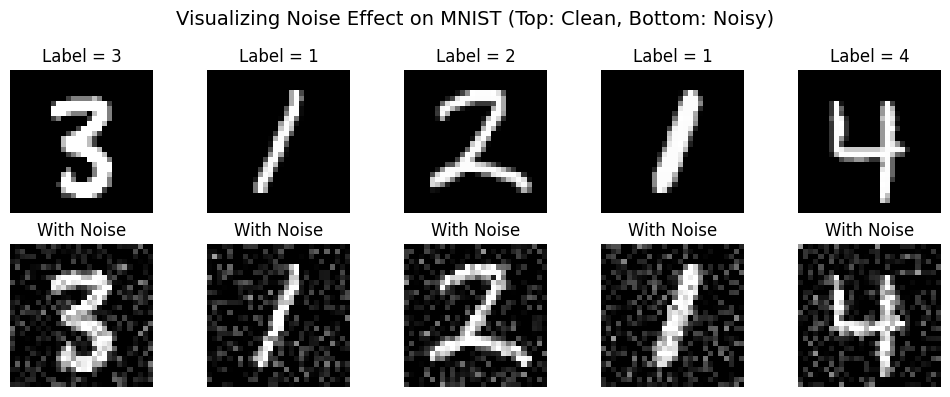

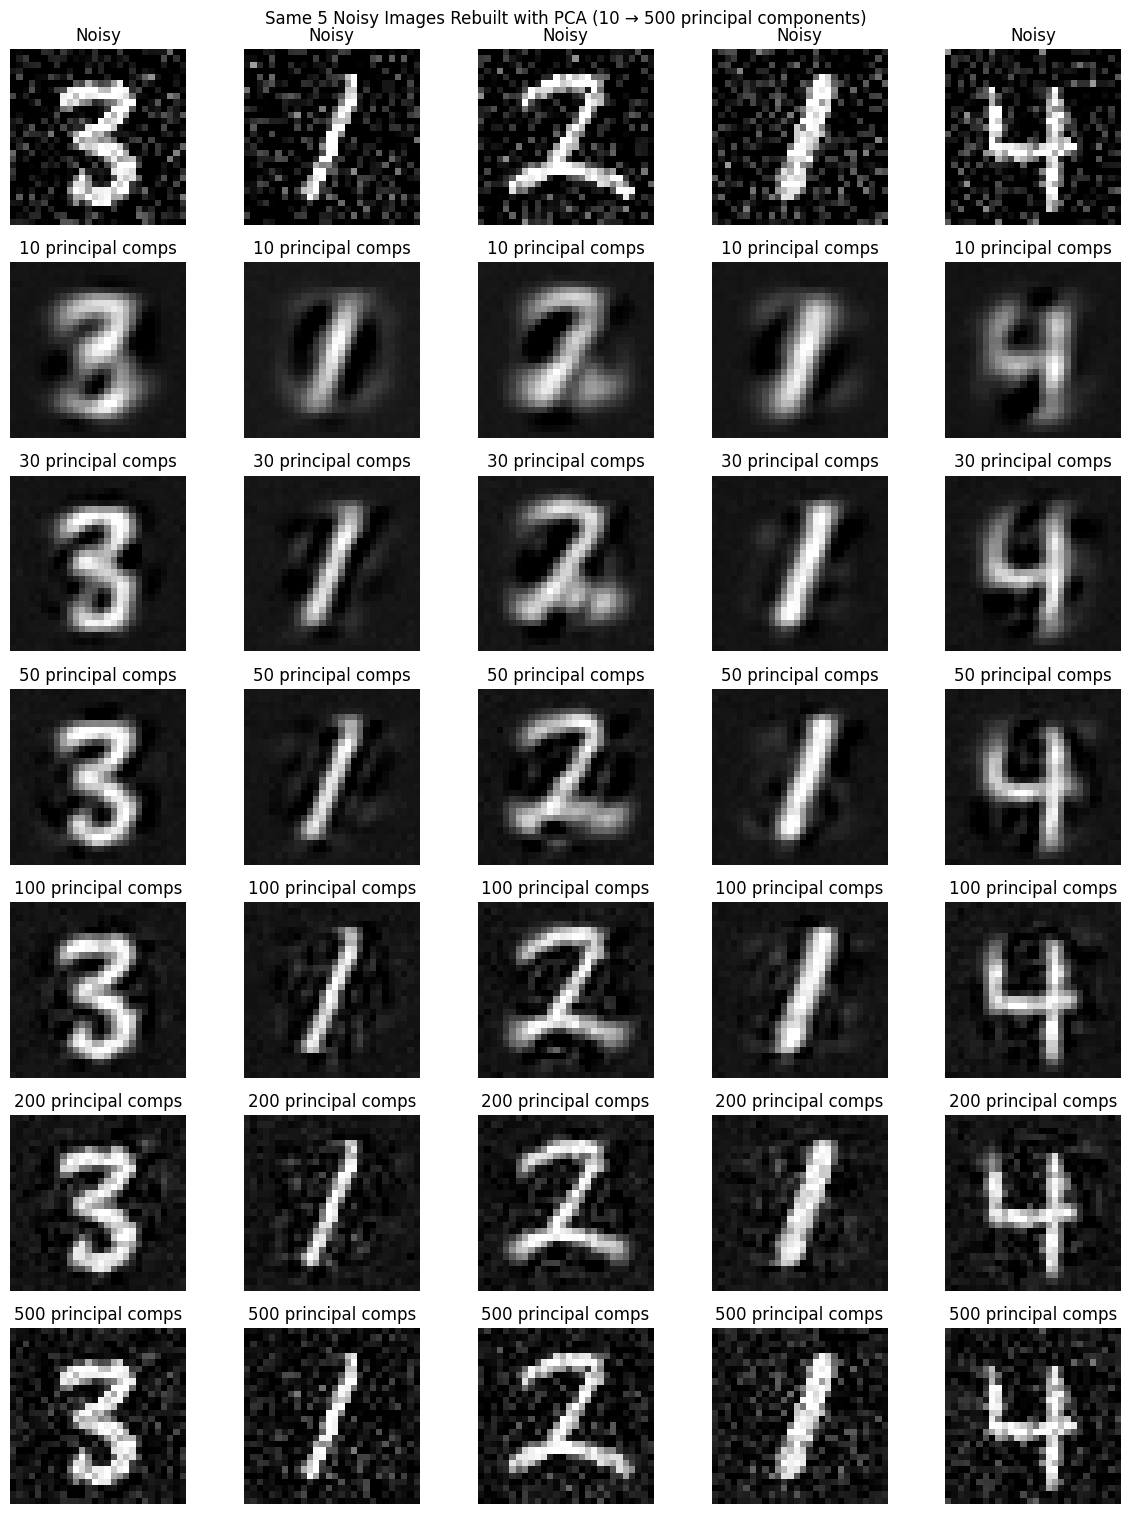

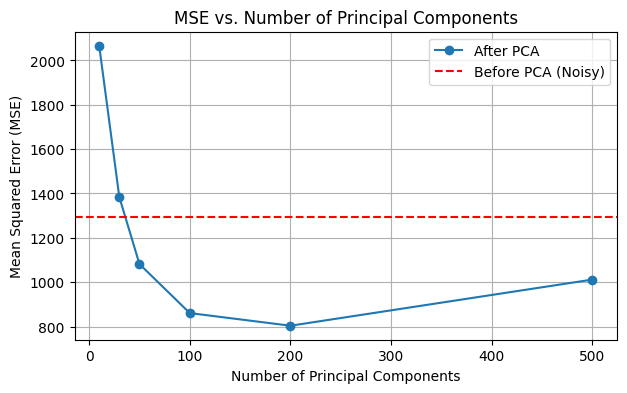

In [ ]:
# -----------------------------------------------------------
# Part 5: PCA for Image Denoising (5.1 - 5.3 all together)
# -----------------------------------------------------------

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Load MNIST and add noise
# -----------------------------
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Break out image data (X) and labels (y)
X = mnist.data.astype(np.float32)  # make sure it's float for math
y = mnist.target.astype(int)

# Pick 5 random images from the dataset
rng = np.random.default_rng(42)  # fixed seed so results are repeatable
chosen_idx = rng.choice(X.shape[0], size=5, replace=False)
chosen_images = X[chosen_idx].reshape(-1, 28, 28)
chosen_labels = y[chosen_idx]

# Add Gaussian noise (mean = 0, std = 50)
noise = rng.normal(loc=0, scale=50, size=chosen_images.shape)
noisy_images = chosen_images + noise
noisy_images = np.clip(noisy_images, 0, 255)  # keep pixels valid

# Show original (top row) and noisy (bottom row) images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(5):
    axes[0, i].imshow(chosen_images[i], cmap="gray")
    axes[0, i].set_title(f"Label = {chosen_labels[i]}")
    axes[0, i].axis("off")

    axes[1, i].imshow(noisy_images[i], cmap="gray")
    axes[1, i].set_title("With Noise")
    axes[1, i].axis("off")

plt.suptitle("Visualizing Noise Effect on MNIST (Top: Clean, Bottom: Noisy)", fontsize=14)
plt.tight_layout()
plt.show()

# -----------------------------
# Step 2: PCA Denoising
# -----------------------------
# Flatten the 5 noisy images so PCA can process them
noisy_flat = noisy_images.reshape(5, 28 * 28)

# Take a small random sample of MNIST to train PCA (faster than full dataset)
sample_idx = np.random.choice(X.shape[0], size=5000, replace=False)
X_sample = X[sample_idx]
X_sample_noisy = X_sample + np.random.normal(0, 50, X_sample.shape)
X_sample_noisy = np.clip(X_sample_noisy, 0, 255)

# Try these principal component counts
principal_components_list = [10, 30, 50, 100, 200, 500]
reconstructed_batches = []  # store reconstructions for plotting

for n_components in principal_components_list:
    pca = PCA(n_components=n_components)
    pca.fit(X_sample_noisy)

    codes = pca.transform(noisy_flat)
    rebuilt = pca.inverse_transform(codes)

    rebuilt = np.clip(rebuilt, 0, 255).reshape(5, 28, 28)
    reconstructed_batches.append(rebuilt)

# Plot the noisy images (top) and reconstructions for each component count
rows = 1 + len(principal_components_list)
cols = 5
plt.figure(figsize=(12, rows * 2.2))

# Row 0: noisy inputs
for i in range(5):
    ax = plt.subplot(rows, cols, i + 1)
    ax.imshow(noisy_images[i], cmap='gray')
    ax.set_title("Noisy")
    ax.axis('off')

# Rows 1+: reconstructions
for r, n_components in enumerate(principal_components_list, start=1):
    imgs = reconstructed_batches[r - 1]
    for i in range(5):
        ax = plt.subplot(rows, cols, r * cols + i + 1)
        ax.imshow(imgs[i], cmap='gray')
        ax.set_title(f"{n_components} principal comps")
        ax.axis('off')

plt.suptitle("Same 5 Noisy Images Rebuilt with PCA (10 → 500 principal components)")
plt.tight_layout()
plt.show()

# -----------------------------
# Step 3: MSE Calculation & Plot
# -----------------------------
# Flatten clean images for comparison
clean_flat = chosen_images.reshape(5, 28 * 28)

# Calculate MSE for each reconstruction
mse_values = []
for batch in reconstructed_batches:
    batch_flat = batch.reshape(5, 28 * 28)
    mse = mean_squared_error(clean_flat, batch_flat)
    mse_values.append(mse)

# Calculate baseline MSE for noisy images (before PCA)
noisy_flat = noisy_images.reshape(5, 28 * 28)
baseline_mse = mean_squared_error(clean_flat, noisy_flat)

# Plot MSE vs number of components
plt.figure(figsize=(7, 4))
plt.plot(principal_components_list, mse_values, marker='o', label="After PCA")
plt.axhline(y=baseline_mse, color='red', linestyle='--', label="Before PCA (Noisy)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Number of Principal Components")
plt.legend()
plt.grid(True)
plt.show()


5.4) PCA helps with denoising because it focuses on the main patterns in the data and ignores random noise. The structure of the handwritten digits is very consistent across the dataset and is responsible for most of the overall variance. Random noise, on the other hand, is scattered, uncorrelated, and does not explain much of the variance.

When PCA analyzes the data, it finds the directions (principal components) where the data varies the most. These directions capture the important structure of the digits. By keeping only the top principal components and discarding the rest, we keep the signal that represents the digit shapes and throw away the small, random variations caused by noise.

When we reconstruct the image from just these top components, the resulting image looks cleaner because it is rebuilt using the most meaningful information. The noise, which was not strongly aligned with the main components, is largely removed in the reconstruction. This is why PCA acts like a natural filter that keeps the useful signal and reduces the unwanted noise.